In [363]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [354]:
df = pd.read_csv(r'Jacaca 34.csv', encoding='latin-1')
df = df.drop(['Tensión L1 In (VAC)', 'Tensión L2 In (VAC)','Tensión L3 In (VAC)', 'Tensión T1 Out (VAC)', 'Tensión T2 Out (VAC)', 'Tensión T3 Out (VAC)', 'Factor de Potencia Salida ()', 'Corriente de Fuga (mA)', 'Corriente de Sistema (mA)', 'Presión Cabeza (Psia)', 'Temperatura Cabeza (°C)', 'Flujo Másico (Kg/h)', 'Densidad (gr/cm3)', 'BS&W (%)','Sensor Toroide 1', 'Sensor Toroide 2', 'Sensor Toroide 3', 'Unidades de Variables', 'Código de Aplicación', 'Nombre de Pozo', 'Potencia Activa Out (KW)','Corriente Motor (A)', 'Vibración Eje Y (Gs)'], axis=1)
df

,Fecha,Hora,Frecuencia Referencia (Hz),Frecuencia Salida (Hz),Corriente VDF (A),Tensión Salida VDF (V),Tensión Bus DC (V),Corriente T1 Out (A),Corriente T2 Out (A),Corriente T3 Out (A),Presión Intake (Psia),Presión Descarga (Psia),Temperatura Intake (°F),Temperatura Motor (°F),Vibración Eje X (Gs),Vibración Eje Z (Gs),Eventos y Fallas
0,10/03/22,09:24:45,58.1,58.1,311,445.6,627,345,351,337,511.2,509.9,239.1,282.5,0.788,0.221,0
1,10/03/22,09:25:15,58.1,58.1,312,445.6,629,351,355,346,510.8,510.8,239.1,278.6,0.851,0.250,0
2,10/03/22,09:25:46,58.1,58.1,311,445.6,627,335,359,342,511.1,510.3,239.1,281.1,0.866,0.304,0
3,10/03/22,09:26:16,58.1,58.1,311,445.6,630,346,352,340,511.2,510.3,239.0,280.9,0.889,0.256,0
4,10/03/22,09:26:46,58.1,58.1,312,445.6,628,350,360,343,511.3,510.7,239.1,281.6,0.826,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304407,22/02/22,17:05:01,58.1,58.1,318,445.6,610,348,350,341,492.4,491.5,239.2,278.1,1.108,0.249,0
1304408,22/02/22,17:05:31,58.1,58.1,318,445.6,614,348,353,336,492.6,491.9,239.1,281.7,0.912,0.264,0
1304409,22/02/22,17:06:01,58.1,58.1,318,445.6,612,351,342,341,492.8,491.6,239.1,281.1,1.013,0.283,0
1304410,22/02/22,17:06:31,58.1,58.1,318,445.6,614,345,354,339,492.4,491.5,239.1,279.9,0.959,0.276,0


In [355]:
#df['Fecha'] = df['Fecha'].str[:6] + '2022'
df['Fecha'] = df['Fecha'].str[:6] + '2022 ' + df['Hora']
df = df.drop(['Hora'], axis=1)

In [356]:
df.head(1)

,Fecha,Frecuencia Referencia (Hz),Frecuencia Salida (Hz),Corriente VDF (A),Tensión Salida VDF (V),Tensión Bus DC (V),Corriente T1 Out (A),Corriente T2 Out (A),Corriente T3 Out (A),Presión Intake (Psia),Presión Descarga (Psia),Temperatura Intake (°F),Temperatura Motor (°F),Vibración Eje X (Gs),Vibración Eje Z (Gs),Eventos y Fallas
0,10/03/2022 09:24:45,58.1,58.1,311,445.6,627,345,351,337,511.2,509.9,239.1,282.5,0.788,0.221,0


In [357]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [358]:
df

,Fecha,Frecuencia Referencia (Hz),Frecuencia Salida (Hz),Corriente VDF (A),Tensión Salida VDF (V),Tensión Bus DC (V),Corriente T1 Out (A),Corriente T2 Out (A),Corriente T3 Out (A),Presión Intake (Psia),Presión Descarga (Psia),Temperatura Intake (°F),Temperatura Motor (°F),Vibración Eje X (Gs),Vibración Eje Z (Gs),Eventos y Fallas
0,2022-03-10 09:24:45,58.1,58.1,311,445.6,627,345,351,337,511.2,509.9,239.1,282.5,0.788,0.221,0
1,2022-03-10 09:25:15,58.1,58.1,312,445.6,629,351,355,346,510.8,510.8,239.1,278.6,0.851,0.250,0
2,2022-03-10 09:25:46,58.1,58.1,311,445.6,627,335,359,342,511.1,510.3,239.1,281.1,0.866,0.304,0
3,2022-03-10 09:26:16,58.1,58.1,311,445.6,630,346,352,340,511.2,510.3,239.0,280.9,0.889,0.256,0
4,2022-03-10 09:26:46,58.1,58.1,312,445.6,628,350,360,343,511.3,510.7,239.1,281.6,0.826,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304407,2022-02-22 17:05:01,58.1,58.1,318,445.6,610,348,350,341,492.4,491.5,239.2,278.1,1.108,0.249,0
1304408,2022-02-22 17:05:31,58.1,58.1,318,445.6,614,348,353,336,492.6,491.9,239.1,281.7,0.912,0.264,0
1304409,2022-02-22 17:06:01,58.1,58.1,318,445.6,612,351,342,341,492.8,491.6,239.1,281.1,1.013,0.283,0
1304410,2022-02-22 17:06:31,58.1,58.1,318,445.6,614,345,354,339,492.4,491.5,239.1,279.9,0.959,0.276,0


In [359]:
df.dtypes

Fecha                         datetime64[ns]
Frecuencia Referencia (Hz)           float64
Frecuencia Salida (Hz)               float64
Corriente VDF (A)                      int64
Tensión Salida VDF (V)               float64
Tensión Bus DC (V)                     int64
Corriente T1 Out (A)                   int64
Corriente T2 Out (A)                   int64
Corriente T3 Out (A)                   int64
Presión Intake (Psia)                float64
Presión Descarga (Psia)              float64
Temperatura Intake (°F)              float64
Temperatura Motor (°F)               float64
Vibración Eje X (Gs)                 float64
Vibración Eje Z (Gs)                 float64
Eventos y Fallas                       int64
dtype: object

In [365]:
plt.dates.date2num(df['Fecha'])
plt.pyplot.plot_date(df['Fecha'], df['Frecuencia Salida (Hz)'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'dates'

In [368]:
df_normalizado = df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [369]:
df_normalizado

,Fecha,Frecuencia Referencia (Hz),Frecuencia Salida (Hz),Corriente VDF (A),Tensión Salida VDF (V),Tensión Bus DC (V),Corriente T1 Out (A),Corriente T2 Out (A),Corriente T3 Out (A),Presión Intake (Psia),Presión Descarga (Psia),Temperatura Intake (°F),Temperatura Motor (°F),Vibración Eje X (Gs),Vibración Eje Z (Gs),Eventos y Fallas
0,-0.871826,0.047042,0.165808,0.324956,0.219879,-0.101751,0.588974,0.566057,0.554450,0.040575,0.038649,0.206840,0.228975,-0.076026,-0.337232,-0.013228
1,-0.871822,0.047042,0.165808,0.342412,0.219879,0.037712,0.642534,0.600897,0.636042,0.039428,0.041228,0.206840,-0.061761,0.167242,-0.097161,-0.013228
2,-0.871819,0.047042,0.165808,0.324956,0.219879,-0.101751,0.499709,0.635736,0.599779,0.040289,0.039795,0.206840,0.124608,0.225163,0.349869,-0.013228
3,-0.871815,0.047042,0.165808,0.324956,0.219879,0.107443,0.597901,0.574767,0.581647,0.040575,0.039795,0.175562,0.109699,0.313976,-0.047491,-0.013228
4,-0.871812,0.047042,0.165808,0.342412,0.219879,-0.032019,0.633607,0.644445,0.608844,0.040862,0.040942,0.206840,0.161882,0.070707,0.010458,-0.013228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304407,-1.021308,0.047042,0.165808,0.447149,0.219879,-1.287180,0.615754,0.557348,0.590713,-0.013330,-0.014096,0.238119,-0.099035,1.159623,-0.105439,-0.013228
1304408,-1.021305,0.047042,0.165808,0.447149,0.219879,-1.008256,0.615754,0.583477,0.545384,-0.012757,-0.012949,0.206840,0.169337,0.402788,0.018736,-0.013228
1304409,-1.021302,0.047042,0.165808,0.447149,0.219879,-1.147718,0.642534,0.487669,0.590713,-0.012183,-0.013809,0.206840,0.124608,0.792790,0.176024,-0.013228
1304410,-1.021298,0.047042,0.165808,0.447149,0.219879,-1.008256,0.588974,0.592187,0.572581,-0.013330,-0.014096,0.206840,0.035151,0.584274,0.118076,-0.013228


In [319]:
(df['Presión Intake (Psia)']>2000).sum()

38099

In [320]:
df['Presión Intake (Psia)'].describe()

count    1.304265e+06
mean     4.971051e+02
std      3.487379e+02
min      1.186000e+02
25%      3.823000e+02
50%      4.676000e+02
75%      5.310000e+02
max      2.466200e+03
Name: Presión Intake (Psia), dtype: float64

<AxesSubplot:>

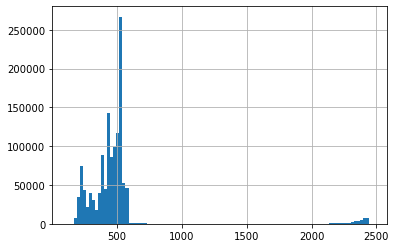

In [323]:
df['Presión Intake (Psia)'].hist(bins=100)

In [328]:
((df['Presión Intake (Psia)']<2000).sum())-((df['Presión Intake (Psia)']<1000).sum())

7235

In [311]:
df = df.drop(df[(df['Temperatura Intake (°F)'] < 20)].index)

<AxesSubplot:>

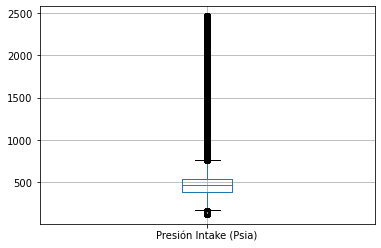

In [321]:
df.boxplot(column=['Presión Intake (Psia)']) 

C:\Users\usuario\AppData\Local\Temp\ipykernel_13248\3865599986.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



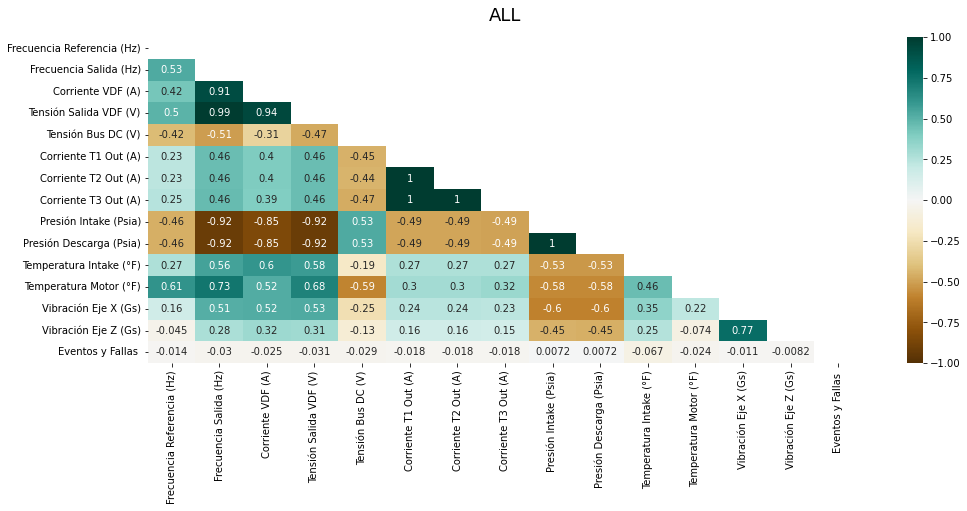

In [331]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('ALL', fontdict={'fontsize':18}, pad=16);

In [ ]:
plt.scatter(df['Presion_Intake'], df['Tensión_In_12'], color='green');
plt.xlabel("Presion_Intake")
plt.ylabel("Tensión_In_12")
plt.show()

In [ ]:
viz = df[['Tensión_In_12', 'Presion_Intake']
viz.hist()
plt.show()

In [ ]:
a='Corriente_de_Salida'
b='Presion_Descarga'
plt.scatter(df[a], df[b], color='green');
plt.xlabel(a)
plt.ylabel(b)
plt.show()

In [ ]:
a='Corriente_de_Salida'
b='Presion_Descarga'

viz = df[[a, b]]
viz.hist()
plt.show()

In [ ]:
a='Presion_Intake'
b='Tensión_In_23'
plt.scatter(df[a], df[b], color='green');
plt.xlabel(a)
plt.ylabel(b)
plt.show()

In [ ]:
a='Presion_Intake'
b='Temperatura_Motor'
plt.scatter(df[a], df[b], color='green');
plt.xlabel(a)
plt.ylabel(b)
plt.show()

In [ ]:
a='Presion_Descarga'
b='Presion_Intake'

viz = df[[a, b]]
viz.hist()
plt.show()

In [ ]:
a='Presion_Descarga'
b='Presion_Intake'
plt.scatter(df[a], df[b], color='red');
plt.xlabel(a)
plt.ylabel(b)
plt.show()

In [ ]:
a='Presion_Descarga'
b='Presion_Intake'

viz = df[[plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
